In [1]:
# Import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

# Mute warnings.
import warnings
warnings.filterwarnings('ignore')

# URL to import data set from GitHub.
# url = 'https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/engine.csv'

In [2]:
# Import the data with a URL link from GitHub.
data = pd.read_csv('https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/engine.csv')
# Display the first 5 rows of the data set.
print(data.shape)
data.head(5)

(19535, 6)


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,682,2.391656,4.617196,2.848982,76.272417,69.884609
1,605,5.466877,6.424361,5.727520,73.222679,74.907314
2,658,3.434232,3.680896,1.678708,88.089916,78.704806
3,749,2.094656,7.120927,1.639670,77.661625,82.386700
4,676,3.538228,5.956472,3.225336,75.226352,67.153220


The dataset comprises 19,535 engine records, each with six features: engine revolutions per minute (RPM), lubrication oil pressure, fuel pressure, coolant pressure, lubrication oil temperature, and coolant temperature.

In [3]:
# Determine metadata of DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 915.8 KB


All six features contain numerical values, with each cell in the dataset representing a quantitative measurement.

In [4]:
# Checking data for missing values
data.isnull().sum()

,0
Engine rpm,0
Lub oil pressure,0
Fuel pressure,0
Coolant pressure,0
lub oil temp,0
Coolant temp,0


The dataset was complete, with no missing values across all 19,535 entries.

In [5]:
# Checking data for duplicated values/rows
data.duplicated().sum()

np.int64(0)

The dataset contains no duplicate rows, ensuring each of the 19,535 engine entries is unique.

In [6]:
# Descriptive statistics of the data
data.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912


In [7]:
# Identifying values beyond the 95th percentile for the first two features
percentiles_95 = data.quantile(0.95)
outliers_95 = {col: data[col][data[col] > percentiles_95[col]].values for col in data.columns[:2]}

outliers_95

{'Engine rpm': array([1411, 1374, 1438, 1399, 1347, 1495, 1454, 1427, 1762, 1494, 1368,
        1546, 1625, 1366, 1378, 1502, 1488, 1340, 1419, 1465, 1420, 1384,
        1370, 1537, 1558, 1618, 1724, 1514, 1424, 1456, 1438, 1441, 1587,
        1515, 1386, 1683, 1470, 1678, 1332, 1446, 1446, 1598, 1685, 1471,
        1464, 1365, 1330, 1350, 1606, 1764, 1476, 1418, 1523, 1470, 1522,
        1682, 1353, 1398, 1676, 1386, 1753, 1411, 1570, 1339, 1622, 1382,
        1435, 1417, 1327, 1342, 1345, 1667, 1583, 1336, 1582, 1386, 2020,
        1457, 1484, 1503, 1621, 1329, 1776, 1498, 1642, 1433, 1338, 1579,
        1586, 1405, 1510, 1403, 1443, 1421, 1398, 1576, 1784, 1437, 1424,
        1357, 1377, 1331, 1368, 1331, 1335, 1486, 1799, 1454, 1377, 1419,
        1670, 1703, 1399, 1563, 1529, 1553, 1463, 1333, 1639, 1577, 1360,
        1412, 1345, 1458, 1478, 1565, 1419, 1438, 1545, 1434, 1345, 1346,
        1357, 1376, 1531, 1449, 1408, 1481, 1381, 1580, 1381, 1762, 1826,
        1345, 1334, 1423

#### Visualizing Distribution of the data (Histograms & Boxplots)

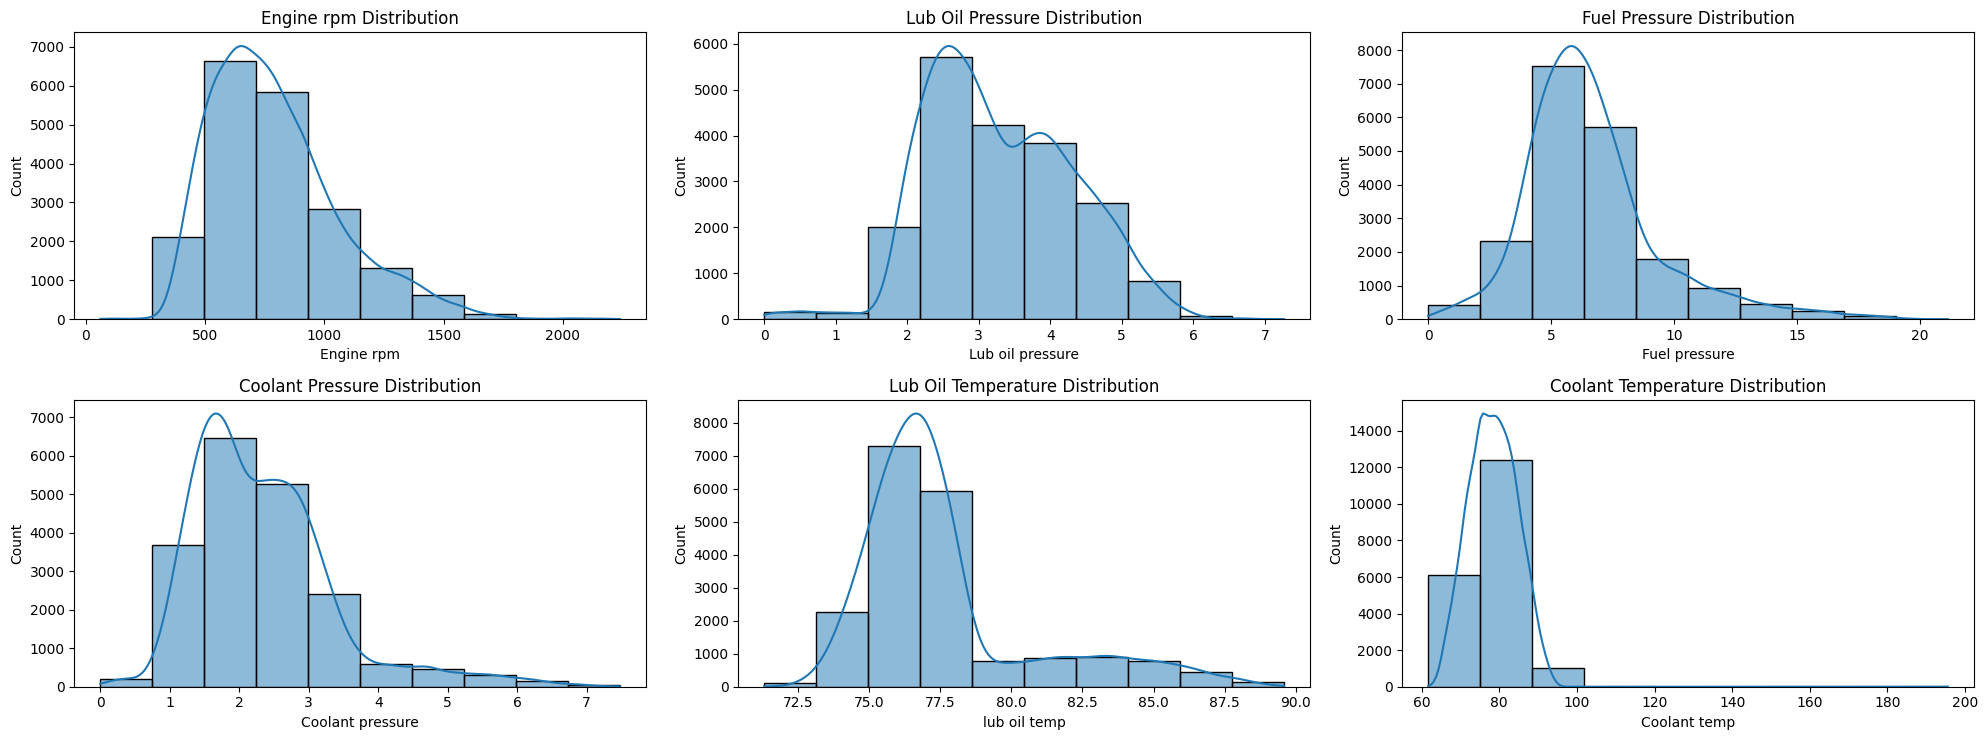

In [8]:
# Create a figure with subplots for each feature
fig, axs =plt.subplots(nrows=2, ncols=3, figsize = (20,7.5))

# Plot histograms with KDE for each feature
sns.histplot(data['Engine rpm'], bins=10, kde=True, ax=axs[0,0])
axs[0, 0].set_title('Engine rpm Distribution')

sns.histplot(data['Lub oil pressure'], bins=10, kde=True, ax=axs[0,1])
axs[0, 1].set_title('Lub Oil Pressure Distribution')

sns.histplot(data['Fuel pressure'], bins=10, kde=True, ax=axs[0, 2])
axs[0, 2].set_title('Fuel Pressure Distribution')

sns.histplot(data['Coolant pressure'], bins=10, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Coolant Pressure Distribution')

sns.histplot(data['lub oil temp'], bins=10, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Lub Oil Temperature Distribution')

sns.histplot(data['Coolant temp'], bins=10, kde=True, ax=axs[1, 2])
axs[1, 2].set_title('Coolant Temperature Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

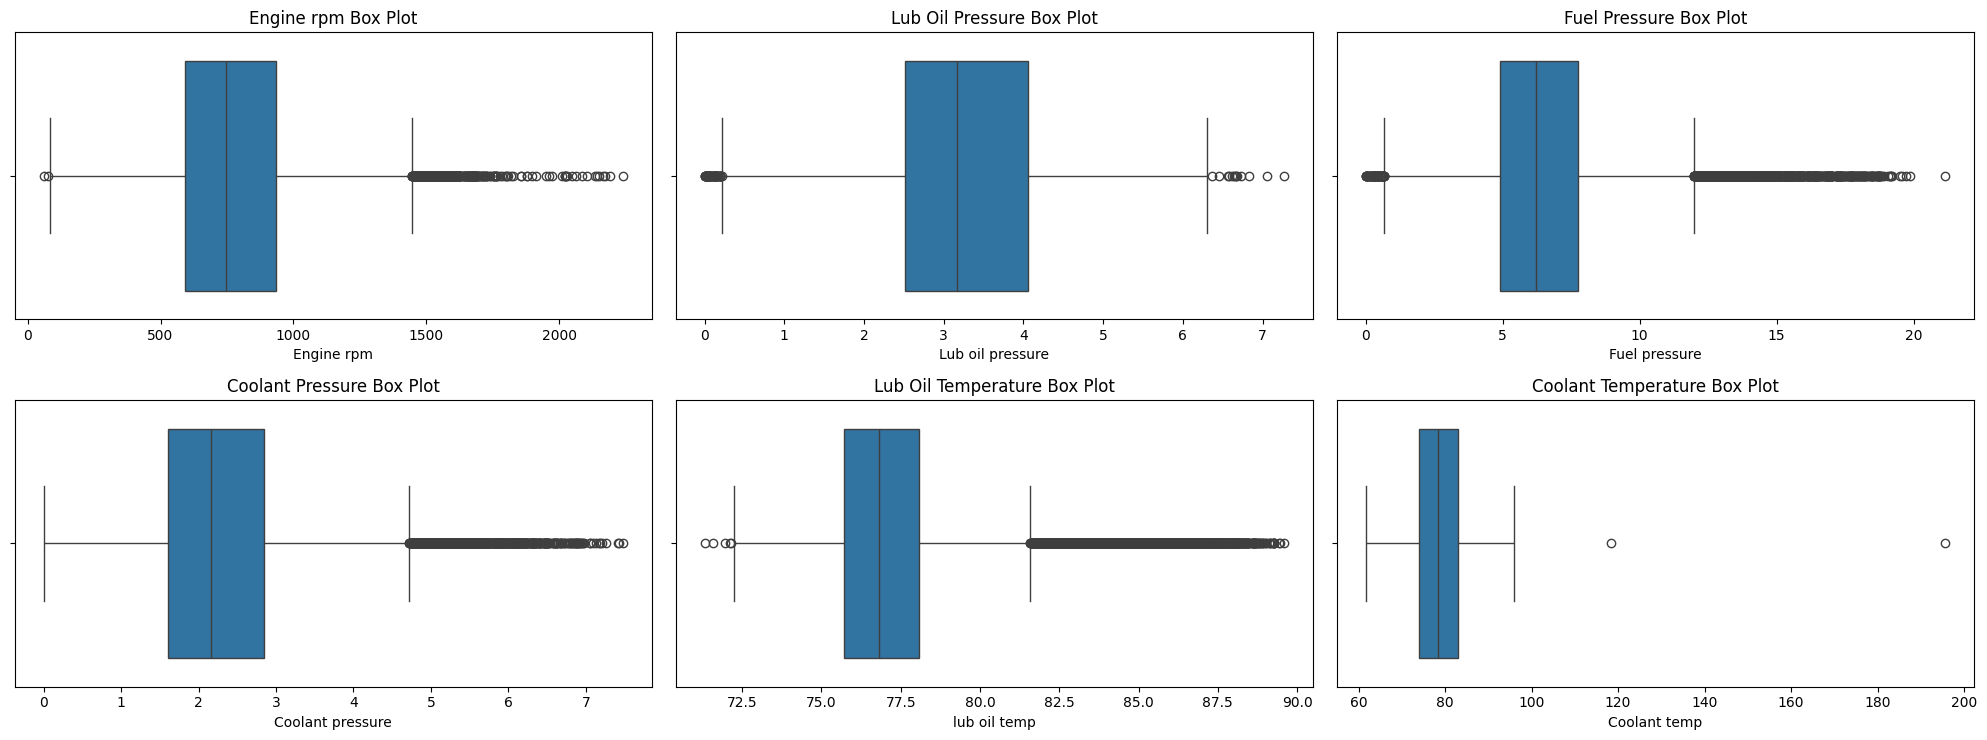

In [9]:
# Create a figure with subplots for each feature
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 7.5))

# Plot box plots for each feature
sns.boxplot(x=data['Engine rpm'], ax=axs[0, 0])
axs[0, 0].set_title('Engine rpm Box Plot')

sns.boxplot(x=data['Lub oil pressure'], ax=axs[0, 1])
axs[0, 1].set_title('Lub Oil Pressure Box Plot')

sns.boxplot(x=data['Fuel pressure'], ax=axs[0, 2])
axs[0, 2].set_title('Fuel Pressure Box Plot')

sns.boxplot(x=data['Coolant pressure'], ax=axs[1, 0])
axs[1, 0].set_title('Coolant Pressure Box Plot')

sns.boxplot(x=data['lub oil temp'], ax=axs[1, 1])
axs[1, 1].set_title('Lub Oil Temperature Box Plot')

sns.boxplot(x=data['Coolant temp'], ax=axs[1, 2])
axs[1, 2].set_title('Coolant Temperature Box Plot')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

#### Anomaly detection with IQR for each feature

In [10]:
# List of columns
columns = data.columns

# Create an empty dictionary to store IQR values
iqr_values = {}

# Loop through each column and calculate IQR
for col in columns:
    Q1 = data[col].quantile(0.25)  # 25th percentile
    Q3 = data[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range
    iqr_values[col] = IQR  # Store IQR in the dictionary

# Convert the dictionary to a DataFrame for better visualization
iqr_df = pd.DataFrame(list(iqr_values.items()), columns=['Feature', 'IQR'])

# Display the IQR values
print(iqr_df)

            Feature         IQR
0        Engine rpm  341.000000
1  Lub oil pressure    1.536457
2     Fuel pressure    2.828087
3  Coolant pressure    1.248374
4      lub oil temp    2.345700
5      Coolant temp    9.019990


In [11]:
# List of columns
columns = data.columns

# Loop through each column and add a binary outlier column
for col in columns:
    Q1 = data[col].quantile(0.25)  # 25th percentile
    Q3 = data[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers

    # Create a binary column for outliers (1 = outlier, 0 = not outlier)
    data[f'{col}_outlier'] = ((data[col] < lower_bound) | (data[col] > upper_bound)).astype(int)

# Display the updated data with binary outlier columns
data.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine rpm_outlier,Lub oil pressure_outlier,Fuel pressure_outlier,Coolant pressure_outlier,lub oil temp_outlier,Coolant temp_outlier
0,682,2.391656,4.617196,2.848982,76.272417,69.884609,0,0,0,0,0,0
1,605,5.466877,6.424361,5.727520,73.222679,74.907314,0,0,0,1,0,0
2,658,3.434232,3.680896,1.678708,88.089916,78.704806,0,0,0,0,1,0
3,749,2.094656,7.120927,1.639670,77.661625,82.386700,0,0,0,0,0,0
4,676,3.538228,5.956472,3.225336,75.226352,67.153220,0,0,0,0,0,0


In [12]:
# Assuming 'data' is your DataFrame with binary outlier columns
# List of binary outlier columns
outlier_columns = [f'{col}_outlier' for col in columns]

# Create a new column to count the number of outliers per row
data['outlier_count'] = data[outlier_columns].sum(axis=1)

# Create a new column to show where two or more features are outliers
data['outlier_engine'] = data['outlier_count'] >= 2

data.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine rpm_outlier,Lub oil pressure_outlier,Fuel pressure_outlier,Coolant pressure_outlier,lub oil temp_outlier,Coolant temp_outlier,outlier_count,outlier_engine
0,682,2.391656,4.617196,2.848982,76.272417,69.884609,0,0,0,0,0,0,0,False
1,605,5.466877,6.424361,5.727520,73.222679,74.907314,0,0,0,1,0,0,1,False
2,658,3.434232,3.680896,1.678708,88.089916,78.704806,0,0,0,0,1,0,1,False
3,749,2.094656,7.120927,1.639670,77.661625,82.386700,0,0,0,0,0,0,0,False
4,676,3.538228,5.956472,3.225336,75.226352,67.153220,0,0,0,0,0,0,0,False


In [13]:
# Count the number or rows(engines) that are considered to be outliers
# ( True are number of rows(engines) with outliers)
data['outlier_engine'].value_counts()

,count
outlier_engine,
False,19113
True,422


In [14]:
# Display data set with only outlier rows
outlier_engine_data = data[data['outlier_engine'] == True]
outlier_engine_data.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine rpm_outlier,Lub oil pressure_outlier,Fuel pressure_outlier,Coolant pressure_outlier,lub oil temp_outlier,Coolant temp_outlier,outlier_count,outlier_engine
113,1495,3.276230,3.714396,2.495264,85.053243,75.743004,1,0,0,0,1,0,2,True
122,1454,2.063374,6.168260,1.260121,83.372256,82.718247,1,0,0,0,1,0,2,True
131,830,3.231908,13.479172,2.568096,87.480362,73.428213,0,0,1,0,1,0,2,True
144,1762,1.697487,4.327845,2.523372,86.750349,82.393211,1,0,0,0,1,0,2,True
148,1494,2.443220,3.548139,1.953403,82.234541,83.953914,1,0,0,0,1,0,2,True


In [15]:
# Get total number of engines
total_engines = len(data)

# Find the highest number of outliers recorded
max_outliers = data['outlier_count'].max()

# Loop through the range of outliers from 0 to the maximum recorded
for i in range(max_outliers + 1):
    count = (data['outlier_count'] == i).sum()
    percentage = (count / total_engines) * 100
    print(f"Percentage of engines with {i} outliers: {percentage:.2f}%")

print(f"{max_outliers} was the highest number of outliers recorded per engine.")


Percentage of engines with 0 outliers: 76.27%
Percentage of engines with 1 outliers: 21.57%
Percentage of engines with 2 outliers: 2.10%
Percentage of engines with 3 outliers: 0.06%
3 was the highest number of outliers recorded per engine.


write observation on how many percentage of engines had outliers
-percentage of how many features had 0 feature as outliers
- percentage of how many features had `1 feature as outliers
-percentage of how many features had 2 feature as outliers
-percentage of how many features had 3 feature as outliers

*   List item
*   List item



### Machine Learning to detect anomalies in the data set

#### One-Class SVM model

#### Data Scaling
The standard scaler is used to scale the dataset as the histograms visualaizaion above shows that some of the features are normal, while others are slightly skewed

In [16]:
data.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine rpm_outlier,Lub oil pressure_outlier,Fuel pressure_outlier,Coolant pressure_outlier,lub oil temp_outlier,Coolant temp_outlier,outlier_count,outlier_engine
0,682,2.391656,4.617196,2.848982,76.272417,69.884609,0,0,0,0,0,0,0,False
1,605,5.466877,6.424361,5.727520,73.222679,74.907314,0,0,0,1,0,0,1,False
2,658,3.434232,3.680896,1.678708,88.089916,78.704806,0,0,0,0,1,0,1,False
3,749,2.094656,7.120927,1.639670,77.661625,82.386700,0,0,0,0,0,0,0,False
4,676,3.538228,5.956472,3.225336,75.226352,67.153220,0,0,0,0,0,0,0,False


In [17]:
X=data[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']]
X.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,682,2.391656,4.617196,2.848982,76.272417,69.884609
1,605,5.466877,6.424361,5.727520,73.222679,74.907314
2,658,3.434232,3.680896,1.678708,88.089916,78.704806
3,749,2.094656,7.120927,1.639670,77.661625,82.386700
4,676,3.538228,5.956472,3.225336,75.226352,67.153220


In [18]:
# Scale the original data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)


# Display scaled dataset

X_scaled = pd.DataFrame(scaled_data, columns=X.columns)
X_scaled.head()


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,-0.408212,-0.892819,-0.738304,0.495596,-0.440709,-1.376412
1,-0.695950,2.117332,-0.083759,3.273154,-1.421047,-0.567158
2,-0.497896,0.127697,-1.077426,-0.633625,3.358026,0.044690
3,-0.157842,-1.183534,0.168533,-0.671293,0.005852,0.637913
4,-0.430633,0.229492,-0.253226,0.858747,-0.776966,-1.816491


StandardScaler was used for Engine rpm, Lub oil pressure, Fuel pressure, and Coolant pressure because these features had a normal to slightly skewed distribution.

RobustScaler was applied to Lub oil temp and Coolant temp due to their highly skewed distribution, making them less sensitive to outliers.

This ensures optimal feature scaling based on the distribution characteristics of each feature.

In [19]:
# Using the One-Class SVM model for anomaly detection
model = OneClassSVM(kernel='rbf', gamma=0.3, nu=0.03)
model.fit(X_scaled)

OneClassSVM(gamma=0.3, nu=0.03)

In [20]:
# Predict the anomaly in the data set
y_pred = model.predict(X_scaled)
print(y_pred)

# Create DataFrame to show anomalies detected
SVM_anomalies = pd.DataFrame(X_scaled, columns=X_scaled.columns)

# Add anomaly labels (1 = normal, -1 = anomaly)
SVM_anomalies['anomaly'] = y_pred

SVM_anomalies

[1 1 1 ... 1 1 1]


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,anomaly
0,-0.408212,-0.892819,-0.738304,0.495596,-0.440709,-1.376412,1
1,-0.695950,2.117332,-0.083759,3.273154,-1.421047,-0.567158,1
2,-0.497896,0.127697,-1.077426,-0.633625,3.358026,0.044690,1
3,-0.157842,-1.183534,0.168533,-0.671293,0.005852,0.637913,1
4,-0.430633,0.229492,-0.253226,0.858747,-0.776966,-1.816491,1
...,...,...,...,...,...,...,...
19530,-0.411949,0.288774,0.233701,-1.208058,-0.461752,-1.382184,1
19531,-0.789372,-1.038290,-0.511826,-0.833709,-0.243824,1.397013,1
19532,-0.654845,0.006141,-1.038745,3.537070,-0.563698,-1.000134,1
19533,1.389218,-0.559945,-1.069205,0.594695,-0.276059,0.478951,1


Columns with a value of 1 represent normal data points.

Columns with a value of -1 are flagged as anomalies.

In [21]:
# Display outliers in the DataFrame.
anomalies = SVM_anomalies[SVM_anomalies.anomaly == -1]

# View output.
print(anomalies.shape)
anomalies

(589, 7)


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,anomaly
9,0.055159,0.629502,5.245553,-0.736041,-0.874377,-1.017425,-1
17,1.946010,2.603387,0.328859,3.470415,0.030684,1.648979,-1
115,-2.728802,0.619474,0.518973,-0.473084,-0.133790,-0.699133,-1
144,3.627597,-1.572300,-0.843105,0.181408,2.927422,0.638962,-1
157,-0.961267,2.562869,4.125055,3.484390,-0.112710,-0.595022,-1
...,...,...,...,...,...,...,...
19317,-1.491901,-1.364488,-0.112758,0.978917,-1.640367,-0.382205,-1
19343,2.555118,-1.096079,-0.035157,-1.032393,2.343389,1.556600,-1
19375,0.776373,-3.109890,-0.561144,1.546654,-0.963731,2.243787,-1
19501,-1.275163,-2.548791,-0.921300,-1.336777,-0.891821,-0.892217,-1


In [22]:
# Check the percentage of outliers after using OneClassSVM
outlier_percentage = (len(anomalies) / len(X)) * 100
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

Percentage of outliers: 3.02%


In [23]:
# use PCA for dimensionality reduction, so as to reduce the dimension for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

print(pca_data)

[[-0.55736171 -0.90651232]
 [-2.17717047 -1.20153816]
 [ 2.05180631  1.03958148]
 ...
 [-0.83238302 -2.1592666 ]
 [ 1.12628638 -0.05147268]
 [-0.50236925 -0.58087528]]


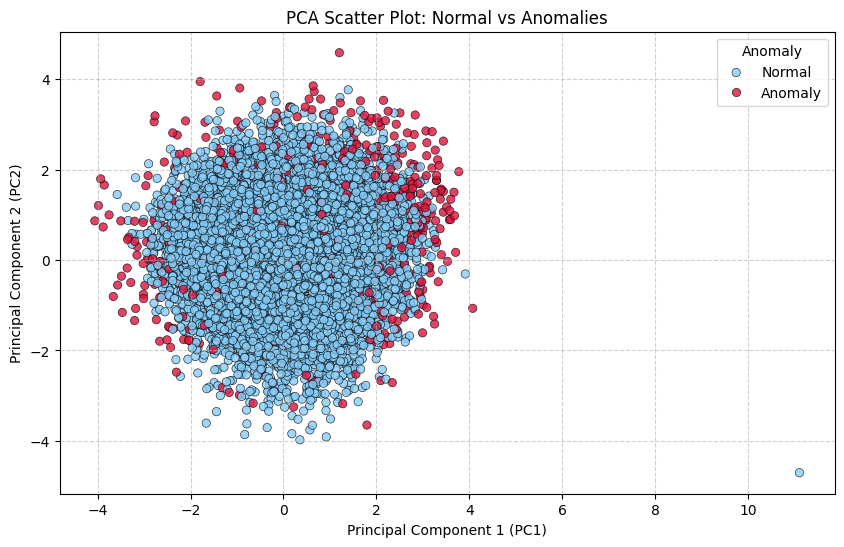

In [36]:
#Combine PCA data frame and One-Class SVM column
pca_anomalies = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_anomalies['anomaly'] = y_pred

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='anomaly', data=pca_anomalies,
                palette={1: 'lightskyblue', -1: 'crimson'},  # Color for normal (1) and anomalies (-1)
                style='anomaly', markers={1: 'o', -1: 'o'},
                alpha=0.8, edgecolor='k')

# Add plot aesthetics
plt.title('PCA Scatter Plot: Normal vs Anomalies')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Anomaly', labels=['Normal', 'Anomaly'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### Isolation forest

In [25]:
X = data[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']]
# Initialize and fit Isolation Forest
iso_forest = IsolationForest(n_estimators=50, contamination=0.03, random_state=42)
iso_forest.fit(X)

IsolationForest(contamination=0.03, n_estimators=50, random_state=42)

In [26]:
scores_pred = iso_forest.decision_function(X)
print(scores_pred)

[0.14629406 0.00079597 0.03005418 ... 0.08596245 0.12777185 0.15820662]


In [27]:
# Predict the anomalies (1 for not anomaly, -1 for anomaly).
y_pred = iso_forest.predict(X)

# View output.
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [28]:
# Create DataFrame to show anomalies detected
iso_forest_anomalies = pd.DataFrame(X, columns=X.columns)
iso_forest_anomalies['anomaly'] = y_pred

iso_forest_anomalies

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,anomaly
0,682,2.391656,4.617196,2.848982,76.272417,69.884609,1
1,605,5.466877,6.424361,5.727520,73.222679,74.907314,1
2,658,3.434232,3.680896,1.678708,88.089916,78.704806,1
3,749,2.094656,7.120927,1.639670,77.661625,82.386700,1
4,676,3.538228,5.956472,3.225336,75.226352,67.153220,1
...,...,...,...,...,...,...,...
19530,681,3.598792,7.300853,1.083391,76.206955,69.848780,1
19531,580,2.243040,5.242489,1.471350,76.884907,87.098119,1
19532,616,3.310048,3.787693,6.001031,75.889810,72.220009,1
19533,1163,2.731726,3.703595,2.951684,76.784626,81.400088,1


In [29]:
# Display anomalies in the DataFrame.
iso_forest_anomalies_only = iso_forest_anomalies[iso_forest_anomalies.anomaly == -1]

# View output.
iso_forest_anomalies_only

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,anomaly
17,1312,5.963439,7.563578,5.931953,77.738876,88.661972,-1
35,1374,2.543575,8.641020,1.541131,82.268575,66.810303,-1
144,1762,1.697487,4.327845,2.523372,86.750349,82.393211,-1
149,1193,3.669258,7.845989,1.229372,85.322621,67.009104,-1
157,534,5.922045,18.044686,5.946436,77.292791,74.734372,-1
...,...,...,...,...,...,...,...
19343,1475,2.184002,6.558549,1.265442,84.933480,88.088609,-1
19370,740,2.792556,11.359028,1.580190,88.791884,70.047659,-1
19375,999,0.126660,5.106325,3.938253,74.645346,92.353698,-1
19433,986,2.929212,14.431486,4.985264,75.477519,69.808798,-1


In [30]:
# Check the percentage of outliers after using OneClassSVM
outlier_percentage = (len(iso_forest_anomalies_only) / len(iso_forest_anomalies)) * 100
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

Percentage of outliers: 3.00%


In [34]:
# use PCA for dimensionality reduction, so as to reduce the dimension for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

print(pca_data)

[[-0.55736171 -0.90651232]
 [-2.17717047 -1.20153816]
 [ 2.05180631  1.03958148]
 ...
 [-0.83238302 -2.1592666 ]
 [ 1.12628638 -0.05147268]
 [-0.50236925 -0.58087528]]


contamination=0.03 the contermination percentage will result in the percentage of outliers

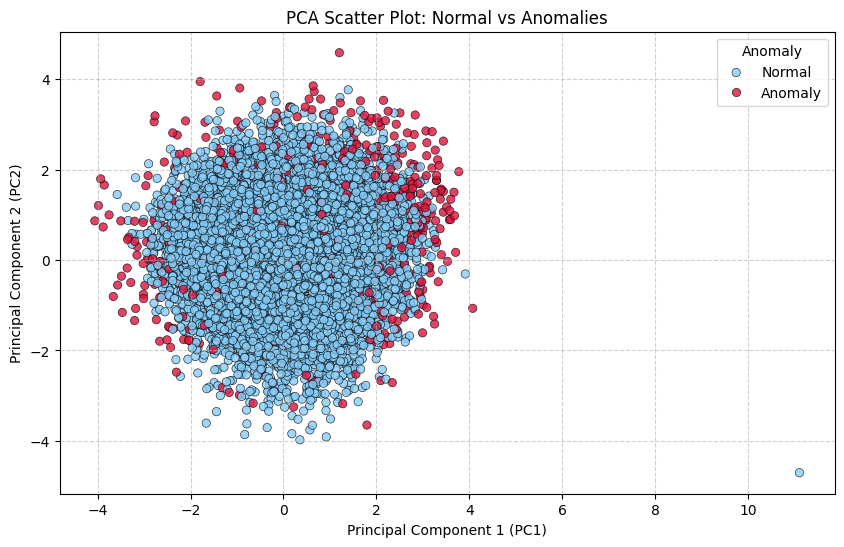

In [35]:
#Combine PCA data frame and One-Class SVM column
pca_anomalies = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_anomalies['anomaly'] = y_pred

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='anomaly', data=pca_anomalies,
                palette={1: 'lightskyblue', -1: 'crimson'},  # Color for normal (1) and anomalies (-1)
                style='anomaly', markers={1: 'o', -1: 'o'},
                alpha=0.8, edgecolor='k')

# Add plot aesthetics
plt.title('PCA Scatter Plot: Normal vs Anomalies')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Anomaly', labels=['Normal', 'Anomaly'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()